In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy as scipy
import statsmodels.stats.proportion

#DataFrame Teste AB

Considerando a base de dados experimento_test_ab.csv responda as questões abaixo:


In [3]:
df_teste = pd.read_csv('experimento_teste_ab.csv')

In [4]:
df_teste.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [5]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [6]:
df_teste.describe()

,Visitante_ID,Visualizações,Conversões
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,150.755500,0.115000
std,577.494589,28.809421,0.319102
min,1.000000,100.000000,0.000000
25%,500.750000,126.000000,0.000000
50%,1000.500000,151.000000,0.000000
75%,1500.250000,175.000000,0.000000
max,2000.000000,199.000000,1.000000


In [7]:
df_teste.columns

Index(['Visitante_ID', 'Versão_Página', 'Visualizações', 'Conversões'], dtype='object')

##Questão 1
Qual dos cenários tem a maior taxa de conversão?

In [8]:
#Para termos a taxa de conversão é necessário dividir a quantidade de conversões pelo valor total de visualizações. Portanto:
df_teste['Taxa_Conversao'] = df_teste['Conversões'] / df_teste['Visualizações']
#Nesse caso, criamos a varíavel para posteriormente realizarmos o agrupamento por versão de página

taxa_conversao = df_teste.groupby('Versão_Página')['Taxa_Conversao'].mean()

print(f"{taxa_conversao.idxmax()} é o melhor cenário com a taxa de conversão de{taxa_conversao.max(): .2%}.")

B é o melhor cenário com a taxa de conversão de 0.08%.


##Questão 2
Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

a.	O cenário A, da base, como o inicial, que funciona hoje.

b.	Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).

c.	Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.

d.	O aumento para 10% de conversão.

In [9]:
taxa_conversao

,Taxa_Conversao
Versão_Página,
A,0.000699
B,0.000849


In [13]:
#Calculando Z score de alpha
alpha = 0.05
alpha_zscore =stats.norm.ppf(1-alpha/2)
print("Z Alpha: ",alpha_zscore)

#Calculando Z score de beta
beta = 0.20
beta_zscore =stats.norm.ppf(1-beta)
print("Z Beta: ",beta_zscore)

#Conversões base
baseline_cr_A = df_teste[df_teste['Versão_Página'] == 'A']['Conversões'].mean() / df_teste['Visualizações'].mean()
print("Conversões base: ", baseline_cr_A)

#Novas conversões
new_cr_A = baseline_cr_A * (1 + 0.10)
print("Conversões esperadas(aumento de 10%): ", new_cr_A)

#Variância
var = baseline_cr_A * (1 - baseline_cr_A)
print("Variância: ", var)

#Delta
delta = new_cr_A - baseline_cr_A
print("Delta: ", delta)

Z Alpha:  1.959963984540054
Z Beta:  0.8416212335729143
Conversões base:  0.0006964920019501775
Conversões esperadas(aumento de 10%):  0.0007661412021451952
Variância:  0.0006960069008413969
Delta:  6.964920019501776e-05


In [14]:
n = ((alpha_zscore + beta_zscore) **2 * var) / (delta ** 2)

print("Amostra necessária para o teste A/B: ", n)

Amostra necessária para o teste A/B:  1126131.1013519592


#DataFrame Pacientes

Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:

In [ ]:
df_pacientes = pd.read_csv('pacientes.csv')

In [ ]:
df_pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [ ]:
df_pacientes.describe()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,150.375623,49.757000,0.503000,1.526000,0.51000
std,288.819436,9.943613,11.682998,0.500241,1.104783,0.50015
min,0.000000,112.929821,30.000000,0.000000,0.000000,0.00000
25%,249.750000,144.240948,40.000000,0.000000,1.000000,0.00000
50%,499.500000,150.455624,49.000000,1.000000,2.000000,1.00000
75%,749.250000,156.792113,60.000000,1.000000,3.000000,1.00000
max,999.000000,181.803131,70.000000,1.000000,3.000000,1.00000


In [ ]:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   int64  
 3   Genero             1000 non-null   int64  
 4   Etnia              1000 non-null   int64  
 5   Estado_Saude       1000 non-null   int64  
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


## Questão 3

Considerando uma amostra de 45 números que representam o index do
dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769,209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768,967,699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,146, 505, 273, 957, 362]).

Considerando essa amostra é possível dizer
que a idade média das pessoas com problemas cardíacos é maior que
50 anos? Nível de significância igual a 5%.


In [ ]:
indices = ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769,
209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967,
699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
146, 505, 273, 957, 362])

#Pegando as idades dos índices no df de pacientes
amostra_idades = df_pacientes.loc[indices, 'Idade']
amostra_idades

,Idade
909,49
751,34
402,68
400,54
726,62
39,50
184,47
269,54
255,51
769,47


In [ ]:
#Conferindo o tamanho da nossa amostra para determinar o tipo de teste que usaremos
len(amostra_idades)

45

Como neste caso conhecemos o desvio padrão populacional e a amostra contém mais de 30 observações iremos utilizar o teste Z. Considerando:

H0: a média das pessoas com problemas cardíacos é <= 50

H1: a média das pessoas com problemas cardíacos é > 50

In [ ]:
#fórmula da estatística Z:
#z = (média amostral - valor de referência) / (desvio padrão/raiz quadrado do número de observações da amostra)

media_amostral_idade = amostra_idades.mean()
valor_ref_idade = 50
dp_idade = amostra_idades.std()
n = len(amostra_idades)

z_idade = (media_amostral_idade - valor_ref_idade) / (dp_idade / np.sqrt(n))

#Determinando alpha (nível de significância)
alpha_idade = 0.05

if z_idade > alpha_idade:
    print('Rejeita H0: a média de pessoas com problemas com problemas cardíacos é > 50')
else:
    print('Não rejeita H0: a média de pessoas com problemas com problemas cardíacos é <= 50')

Rejeita H0: a média de pessoas com problemas com problemas cardíacos é > 50


## Questão 4
Queremos entender que tipo de amostra estamos lidando se dividirmos
os conjuntos em 2, sendo um com pessoas que têm condições de
saúde adicionais e o outro com pessoas saudáveis. Seria dependente
ou independente?

Para essa pergunta, podemos dizer que os dois conjuntos são **independentes** uma vez que a condição de saúde de um conjunto não tem influencia sobre a saúde do outro.

Mas podemos fazer análises comparando o estado de saúde dos grupos com a idade:

In [ ]:
#Verificando a quantidade de pessoas em cada conjunto:
df_pacientes['Nome_Estado_Saude'].value_counts()

,count
Nome_Estado_Saude,
Com condições de saúde adicionais,510
Saudável,490


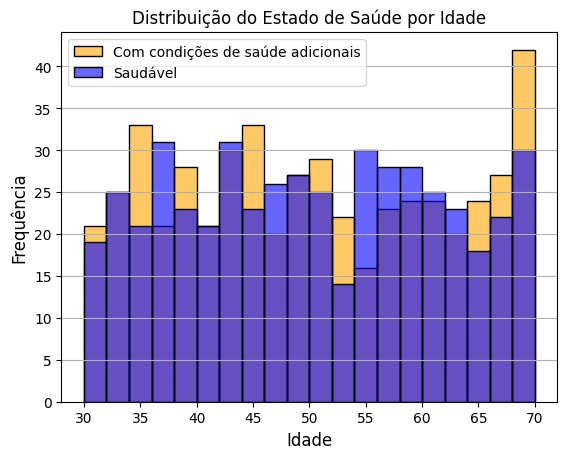

In [ ]:
#Plotando a distribuição da idade por estado de saúde
sns.histplot(df_pacientes[df_pacientes['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']['Idade'], label='Com condições de saúde adicionais', bins=20, color = 'Orange', alpha = 0.6)
sns.histplot(df_pacientes[df_pacientes['Nome_Estado_Saude'] == 'Saudável']['Idade'], label='Saudável', bins=20, color = 'Blue', alpha = 0.6)
plt.title('Distribuição do Estado de Saúde por Idade')
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y')
plt.legend()
plt.show()

##Questão 5
Agora considere o um conjunto de pessoas aleatória que representam
o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60,319,588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346,354, 966, 943, 372]), podemos dizer que a pressão arterial média para
pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde?

Considere o nível de significância a 6%

In [ ]:
indices_1 = ([690, 894, 67, 201, 364, 19, 60,319,588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346,354, 966, 943, 372])

#Pegando os dados dos índices no df de pacientes
amostra_pressao = df_pacientes.loc[indices_1]
amostra_pressao

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
690,690,156.250881,61,0,0,1,Masculino,Caucasiano,Com condições de saúde adicionais
894,894,150.116480,33,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
67,67,158.427577,45,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
201,201,152.837941,64,0,1,0,Masculino,Afro-americano,Saudável
364,364,149.415598,67,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
19,19,160.089332,38,1,1,0,Feminino,Afro-americano,Saudável
60,60,161.136755,35,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
319,319,161.163704,52,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
588,588,145.063568,64,0,1,1,Masculino,Afro-americano,Com condições de saúde adicionais
643,643,157.556943,45,0,2,0,Masculino,Hispânico,Saudável


In [ ]:
#Separando os conjuntos
df_saude_adicional = amostra_pressao[amostra_pressao['Estado_Saude'] == 1]['Pressao_Arterial']
df_saudavel = amostra_pressao[amostra_pressao['Estado_Saude'] == 0]['Pressao_Arterial']

In [ ]:
#Conferindo o tamanho da nossa amostra para determinar o tipo de teste que usaremos
len(df_saude_adicional),len(df_saudavel)

(15, 11)

Como neste caso as amostras são independentes, onde uma não influência a outra, pesquisando, encontrei a seguinte fórmula:

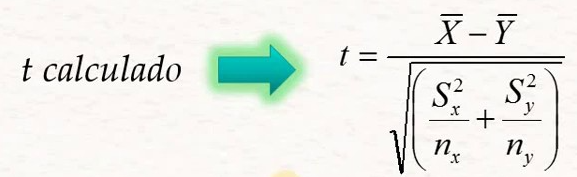

Ela é utilizada no teste T para amostras independentes, precisamos também encontrar o grau de liberdade

Portanto, considerando:

H0: A média da pressão arterial para pacientes com condições de saúde adicional **é igual** à pressão arterial média para pacientes sem condições adicionais de saúde

H1: A média da pressão arterial para pacientes com condições de saúde adicional **é diferente** da pressão arterial média para pacientes sem condições adicionais de saúde

In [ ]:
#fórmula da estatística t:
#t = (média amostral x - média amostral y) / raiz quadrada de ((desvio padrão de x elevado a 2 / número de observações de x) + (desvio padrão de y elevado a 2 / número de observações de y))

media_amostral_adicional = df_saude_adicional.mean()
media_amostral_saudavel = df_saudavel.mean()
dp_adicional = df_saude_adicional.std()
dp_saudavel = df_saudavel.std()
n_adicional = len(df_saude_adicional)
n_saudavel = len(df_saudavel)

t = (media_amostral_adicional - media_amostral_saudavel) / np.sqrt((dp_adicional**2 / n_adicional) + (dp_saudavel**2 / n_saudavel))

#Calculando os graus de liberdade
graus_de_liberdade = n_adicional + n_saudavel - 2

#Determinando alpha (nível de significância de 6%)
alpha_pressao = 0.06

#Calcuando o valor_critico
valor_critico = stats.t.ppf(1 - alpha_pressao/2, graus_de_liberdade) #o módulo stats.t.ppf calcula o valor crítico da distribuição

if t > valor_critico:
    print('Rejeita H0: A média da pressão arterial para pacientes com condições de saúde adicional é diferente da pressão arterial média para pacientes sem condições adicionais de saúde')
else:
    print('Não rejeita H0: A média da pressão arterial para pacientes com condições de saúde adicional é igual à pressão arterial média para pacientes sem condições adicionais de saúde')


Não rejeita H0: A média da pressão arterial para pacientes com condições de saúde adicional é igual à pressão arterial média para pacientes sem condições adicionais de saúde


##Questão 6
Existe uma diferença significativa na pressão arterial média entre
diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)

a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos
os grupos étnicos.

b. Hipótese Alternativa (H1): Há uma diferença significativa na
pressão arterial média entre pelo menos dois grupos étnicos
nesta população

In [ ]:
#Identificando os diferentes grupos étnicos
df_pacientes['Nome_Etnia'].unique()

array(['Afro-americano', 'Asiático', 'Hispânico', 'Caucasiano'],
      dtype=object)

In [ ]:
#Criando um DF com as variáveis de etnia e pressão arterial
df_grupos_etnicos = pd.DataFrame({"etnia":df_pacientes['Nome_Etnia'],"pressao_arterial":df_pacientes['Pressao_Arterial']})

#Agrupar os dados por grupo étnico
grupos = df_grupos_etnicos.groupby("etnia").groups #o groups retorna um dicionário com os índices do df_pacientes

#Pegando a etnia das pessoas nos grupos determinados
afro_americano = df_pacientes['Pressao_Arterial'][grupos["Afro-americano"]]
asiatico = df_pacientes['Pressao_Arterial'][grupos["Asiático"]]
hispanico = df_pacientes['Pressao_Arterial'][grupos["Hispânico"]]
caucasiano = df_pacientes['Pressao_Arterial'][grupos["Caucasiano"]]

#Utilizando o teste ANOVA
estatistica_f, p_value = stats.f_oneway(afro_americano, asiatico, hispanico, caucasiano)

#Determinando alpha (nível de significância de 6%)
alpha_etnia = 0.06

if p_value < alpha:
    print('Rejeita H0: Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população')
else:
    print('Não rejeita H0: A pressão arterial média é a mesma em todos os grupos étnicos.')


Não rejeita H0: A pressão arterial média é a mesma em todos os grupos étnicos.


##Questão 7

Lúcia é uma pesquisadora e tem o objetivo de entender a relação de
gênero neste grupo de pacientes. Acredita-se que há uma relação
entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)


In [ ]:
from tabulate import tabulate

#Criando a tabela de contigência com o crosstab
data_crosstab = pd.crosstab(df_pacientes['Nome_Genero'],
                            df_pacientes['Nome_Estado_Saude'])

print(tabulate(data_crosstab,
               headers = ['Com condições de saúde adicionais', 'Saudável'],
               tablefmt = 'fancy_grid',
               stralign='center',
               numalign='center'))

╒═══════════╤═════════════════════════════════════╤════════════╕
│           │  Com condições de saúde adicionais  │  Saudável  │
╞═══════════╪═════════════════════════════════════╪════════════╡
│ Feminino  │                 257                 │    246     │
├───────────┼─────────────────────────────────────┼────────────┤
│ Masculino │                 253                 │    244     │
╘═══════════╧═════════════════════════════════════╧════════════╛


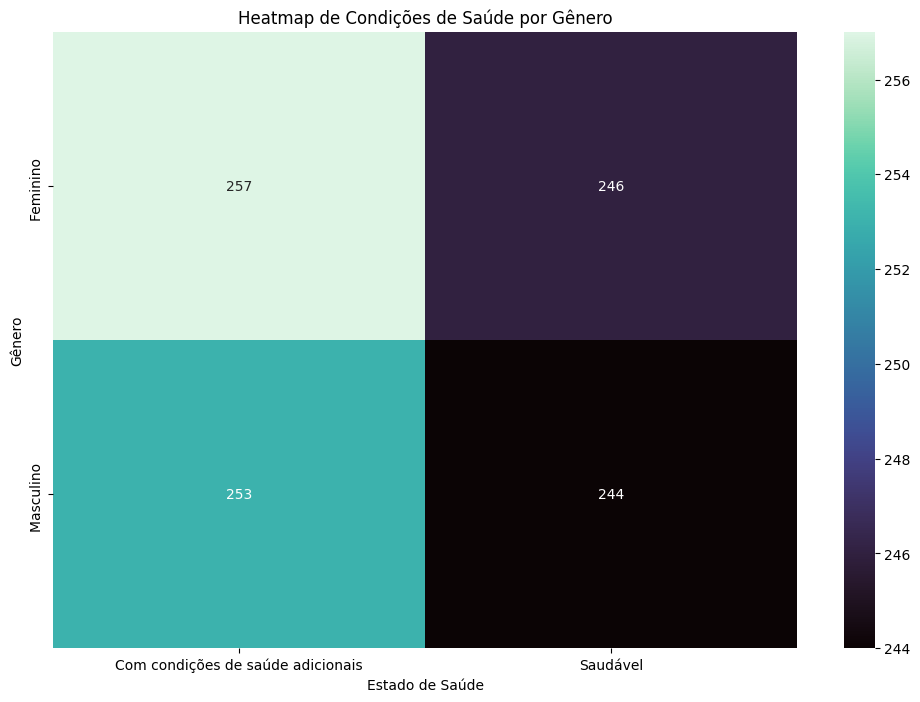

In [ ]:
#Plotando um heatmap (mais bonitinho para visualizar, amei esse heatmap)
plt.figure(figsize=(12,8))
x_axis_labels = ['Com condições de saúde adicionais', 'Saudável']
y_axis_labels = ['Feminino ', 'Masculino ']
sns.heatmap(data_crosstab, annot=True, cmap="mako",fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title("Heatmap de Condições de Saúde por Gênero")
plt.xlabel("Estado de Saúde")
plt.ylabel("Gênero")
plt.show()

Determinando as hipóteses:

H0: As variáveis gênero e condições de saúde adicionais **não possuem** grau de associação

H1: As variáveis gênero e condições de saúde adicionais **possuem grau** de associação

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

estatistica_qui_quadrado, p_value, grau_liberdade_a, tab_expected = chi2_contingency(data_crosstab)

#Determinando alpha 5%
alpha = 0.05

if p_value <= alpha:
    print('Rejeita H0: As variáveis gênero e condições de saúde adicionais possuem grau de associação.')
else:
    print('Não rejeita H0: As variáveis gênero e condições de saúde adicionais não possuem grau de associação.')

Não rejeita H0: As variáveis gênero e condições de saúde adicionais não possuem grau de associação.


##Questão 8
Existe uma associação entre a idade dos pacientes e sua pressão arterial?

a. Hipótese Nula (H0): se a pressão arterial é independente da idade

b. Hipótese Alternativa (H1): a pressão arterial esta associada a
idade

Para esta questão vamos utilizar o teste de correlação de Pearson, que mede se duas variáveis estão linearmente relacionadas

In [ ]:
from scipy.stats import pearsonr

#Cálculo do teste de correlação de Pearson
correlacao_p, p_value_a = pearsonr(df_pacientes['Idade'], df_pacientes['Pressao_Arterial'])

#Considerando alpha 5%
if p_value_a < 0.05:
    print('Rejeita H0: A pressão arterial está associada a idade.')
else:
    print('Não rejeita H0: A pressão arterial é independente da idade.')

Não rejeita H0: A pressão arterial é independente da idade.


##Questão 9
Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

In [ ]:
#Filtrando o DF
df_saude_adicional_a = df_pacientes[df_pacientes['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']

#Calculando o intervalo de confiança utilizando a função t.interval
media_pressao_arterial = df_saude_adicional_a['Pressao_Arterial'].mean()
dp_pressao_arterial = df_saude_adicional_a['Pressao_Arterial'].std()
graus_liberdade = len(df_saude_adicional_a) - 1

limite_inferior,limite_superior = stats.t.interval(0.95, graus_liberdade, loc=media_pressao_arterial, scale=dp_pressao_arterial)
print(f'Limite inferior: {round(limite_inferior)} \nLimite superior: {round(limite_superior)}')

Limite inferior: 130 
Limite superior: 170


##Questão 10
A distribuição da pressão arterial na população segue uma distribuição
normal?

a. Hipótese Nula (H0): A distribuição da pressão arterial na
população segue uma distribuição normal.

b. Hipótese Alternativa (H1): A distribuição da pressão arterial na
população não segue uma distribuição normal.

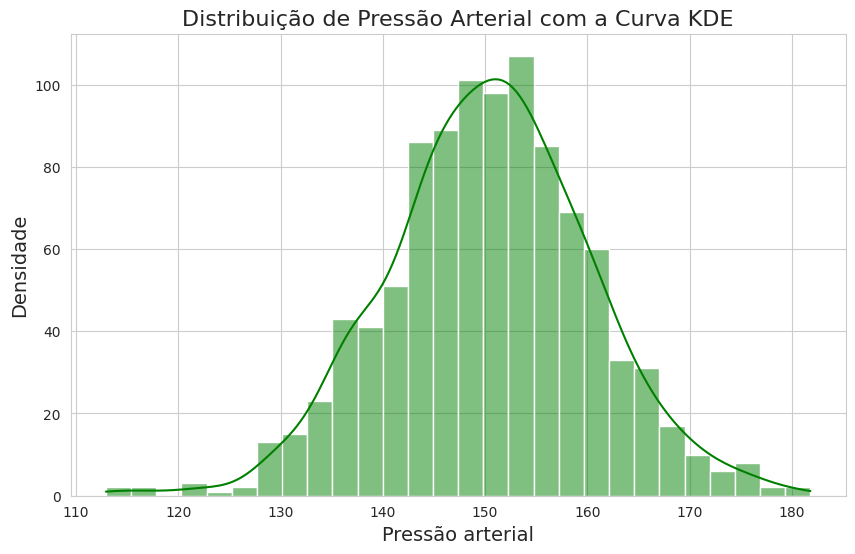

In [ ]:
#Plotando a distribuição de pressão arterial
plt.figure(figsize=(10, 6))
sns.histplot(df_pacientes['Pressao_Arterial'], kde=True, color='green')
plt.title('Distribuição de Pressão Arterial com a Curva KDE', fontsize=16)
plt.xlabel('Pressão arterial', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(True)
plt.show()

Podemos ver que a distribuição se assemelha a uma normal, através do formato de sino e a curva nunca encostando no eixo x.

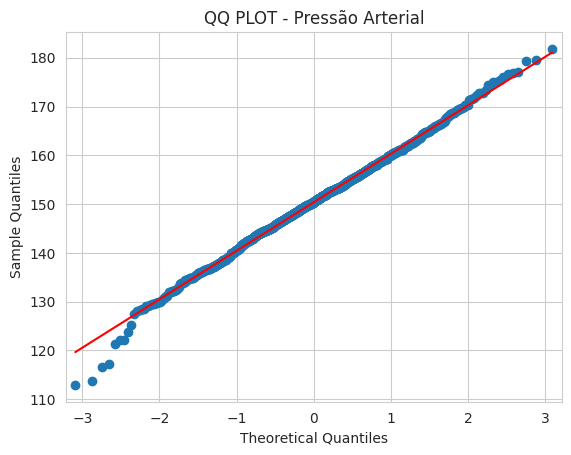

In [ ]:
import statsmodels.api as sm

#Plotando o QQ plot
sm.qqplot(df_pacientes['Pressao_Arterial'], line='s') #aqui, o line='s' adiciona a linha que indica uma distribuição normal
plt.title("QQ PLOT - Pressão Arterial")
plt.show()

No QQ plot é possível identificar que os dados seguem 45 graus, o que também pode nos indicar que é uma distribuição normal.

In [ ]:
from scipy.stats import kstest

#Realizando o teste KS
estatistica_ks, p_value_ks = kstest(df_pacientes['Pressao_Arterial'], 'norm', args=(df_pacientes['Pressao_Arterial'].mean(), df_pacientes['Pressao_Arterial'].std()))

#Considerando alpha 5%
if p_value_ks < 0.05:
    print('Rejeita H0: A distribuição da pressão arterial na população não segue uma distribuição normal.')
else:
    print('Não rejeita H0: A distribuição da pressão arterial na população segue uma distribuição normal.')

Não rejeita H0: A distribuição da pressão arterial na população segue uma distribuição normal.
